# Load images

In [4]:
import cv2
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import urllib
import wget
import random

import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import urllib
import wget

In [5]:
flowers = glob.glob('./data/flr_*.jpg')
fungus = glob.glob('./data/fgs_*.jpg')
rocks = glob.glob('./data/rck_*.jpg')

pixel_flowers = glob.glob('./data/pxl_flower_*.jpeg')
pixel_umbrella = glob.glob('./data/pxl_umbrella_*.jpeg')
print("There are %s, %s flower, %s fungus, %s rock and %s umbrella pictures" %(len(flowers), len(pixel_flowers), len(fungus), len(rocks), len(pixel_umbrella)))

There are 855, 1850 flower, 731 fungus, 963 rock and 422 umbrella pictures


# Resize images

In [7]:
index = random.randint(1, len(pixel_flowers))
filepath = pixel_flowers[index]

img = mpimg.imread(filepath)
img.shape

(3648, 4877, 3)

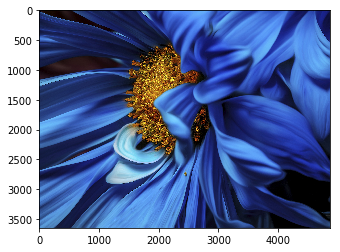

In [8]:
imgplot = plt.imshow(img)
plt.show()

In [9]:
# VGG models uses [224, 224] input size images
width = 224
height = 224

dim = (width, height)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 

resized.shape

(224, 224, 3)

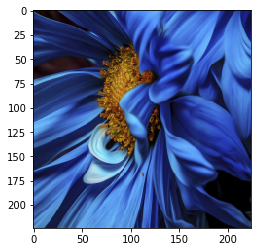

In [10]:
imgplot = plt.imshow(resized)
plt.show()

In [11]:
def resized(width, height, img):
    dim = (width, height)
    img_resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return img_resized[:,:,0:3] # And only take the RGB

# Store rized images to npz

In [13]:
import time

bundle_list = [flowers, fungus, rocks, pixel_flowers, pixel_umbrella]
npz_list = ["./npz/flr-imgs224.npz", 
             "./npz/fgs-imgs224.npz", 
             "./npz/rck-imgs224.npz", 
             "./npz/pxl_flr-imgs224.npz", 
             "./npz/pxl_umb-imgs224.npz"]
             
for i in range(len(bundle_list)):
    process_file = bundle_list[i]
    save_filename = npz_list[i]
    resized_array = []
    for j in range(len(process_file)):
        try:
            item_filepath = process_file[j]

            img = mpimg.imread(item_filepath)
            if len(img.shape) == 3 and img.shape[2] == 3:
                resized_img = resized(224, 224, img) 
                print(j, item_filepath, resized_img.shape)
                resized_array.append(resized_img)
        except:
            print("Error reading the image!")
    output = np.array(resized_array)
    np.savez(save_filename, output)

0 ./data\flr_00001.jpg (224, 224, 3)
1 ./data\flr_00005.jpg (224, 224, 3)
2 ./data\flr_00011.jpg (224, 224, 3)
3 ./data\flr_00014.jpg (224, 224, 3)
4 ./data\flr_00017.jpg (224, 224, 3)
5 ./data\flr_00020.jpg (224, 224, 3)
6 ./data\flr_00024.jpg (224, 224, 3)
7 ./data\flr_00025.jpg (224, 224, 3)
8 ./data\flr_00027.jpg (224, 224, 3)
9 ./data\flr_00028.jpg (224, 224, 3)
10 ./data\flr_00034.jpg (224, 224, 3)
11 ./data\flr_00035.jpg (224, 224, 3)
12 ./data\flr_00040.jpg (224, 224, 3)
13 ./data\flr_00045.jpg (224, 224, 3)
14 ./data\flr_00046.jpg (224, 224, 3)
15 ./data\flr_00047.jpg (224, 224, 3)
16 ./data\flr_00048.jpg (224, 224, 3)
17 ./data\flr_00054.jpg (224, 224, 3)
18 ./data\flr_00055.jpg (224, 224, 3)
19 ./data\flr_00056.jpg (224, 224, 3)
20 ./data\flr_00061.jpg (224, 224, 3)
21 ./data\flr_00063.jpg (224, 224, 3)
22 ./data\flr_00064.jpg (224, 224, 3)
23 ./data\flr_00075.jpg (224, 224, 3)
24 ./data\flr_00077.jpg (224, 224, 3)
25 ./data\flr_00078.jpg (224, 224, 3)
26 ./data\flr_00081.jp

231 ./data\flr_00910.jpg (224, 224, 3)
232 ./data\flr_00912.jpg (224, 224, 3)
233 ./data\flr_00915.jpg (224, 224, 3)
234 ./data\flr_00921.jpg (224, 224, 3)
235 ./data\flr_00922.jpg (224, 224, 3)
236 ./data\flr_00926.jpg (224, 224, 3)
237 ./data\flr_00927.jpg (224, 224, 3)
238 ./data\flr_00928.jpg (224, 224, 3)
239 ./data\flr_00931.jpg (224, 224, 3)
240 ./data\flr_00937.jpg (224, 224, 3)
241 ./data\flr_00938.jpg (224, 224, 3)
242 ./data\flr_00942.jpg (224, 224, 3)
243 ./data\flr_00944.jpg (224, 224, 3)
244 ./data\flr_00947.jpg (224, 224, 3)
245 ./data\flr_00949.jpg (224, 224, 3)
246 ./data\flr_00952.jpg (224, 224, 3)
247 ./data\flr_00954.jpg (224, 224, 3)
248 ./data\flr_00955.jpg (224, 224, 3)
249 ./data\flr_00956.jpg (224, 224, 3)
250 ./data\flr_00957.jpg (224, 224, 3)
251 ./data\flr_00965.jpg (224, 224, 3)
252 ./data\flr_00967.jpg (224, 224, 3)
253 ./data\flr_00968.jpg (224, 224, 3)
254 ./data\flr_00971.jpg (224, 224, 3)
255 ./data\flr_00973.jpg (224, 224, 3)
256 ./data\flr_00974.jpg 

454 ./data\flr_01477.jpg (224, 224, 3)
455 ./data\flr_01478.jpg (224, 224, 3)
456 ./data\flr_01479.jpg (224, 224, 3)
457 ./data\flr_01480.jpg (224, 224, 3)
458 ./data\flr_01481.jpg (224, 224, 3)
459 ./data\flr_01482.jpg (224, 224, 3)
460 ./data\flr_01483.jpg (224, 224, 3)
461 ./data\flr_01484.jpg (224, 224, 3)
462 ./data\flr_01485.jpg (224, 224, 3)
463 ./data\flr_01486.jpg (224, 224, 3)
464 ./data\flr_01487.jpg (224, 224, 3)
465 ./data\flr_01488.jpg (224, 224, 3)
466 ./data\flr_01489.jpg (224, 224, 3)
467 ./data\flr_01491.jpg (224, 224, 3)
468 ./data\flr_01492.jpg (224, 224, 3)
469 ./data\flr_01493.jpg (224, 224, 3)
470 ./data\flr_01494.jpg (224, 224, 3)
471 ./data\flr_01495.jpg (224, 224, 3)
472 ./data\flr_01496.jpg (224, 224, 3)
473 ./data\flr_01497.jpg (224, 224, 3)
474 ./data\flr_01500.jpg (224, 224, 3)
475 ./data\flr_01501.jpg (224, 224, 3)
476 ./data\flr_01502.jpg (224, 224, 3)
477 ./data\flr_01503.jpg (224, 224, 3)
478 ./data\flr_01505.jpg (224, 224, 3)
479 ./data\flr_01506.jpg 

666 ./data\flr_01717.jpg (224, 224, 3)
667 ./data\flr_01718.jpg (224, 224, 3)
668 ./data\flr_01719.jpg (224, 224, 3)
669 ./data\flr_01720.jpg (224, 224, 3)
670 ./data\flr_01721.jpg (224, 224, 3)
671 ./data\flr_01722.jpg (224, 224, 3)
672 ./data\flr_01723.jpg (224, 224, 3)
673 ./data\flr_01724.jpg (224, 224, 3)
674 ./data\flr_01725.jpg (224, 224, 3)
675 ./data\flr_01726.jpg (224, 224, 3)
676 ./data\flr_01727.jpg (224, 224, 3)
677 ./data\flr_01728.jpg (224, 224, 3)
678 ./data\flr_01729.jpg (224, 224, 3)
679 ./data\flr_01730.jpg (224, 224, 3)
680 ./data\flr_01731.jpg (224, 224, 3)
681 ./data\flr_01732.jpg (224, 224, 3)
682 ./data\flr_01734.jpg (224, 224, 3)
683 ./data\flr_01735.jpg (224, 224, 3)
684 ./data\flr_01736.jpg (224, 224, 3)
685 ./data\flr_01737.jpg (224, 224, 3)
686 ./data\flr_01738.jpg (224, 224, 3)
687 ./data\flr_01739.jpg (224, 224, 3)
688 ./data\flr_01740.jpg (224, 224, 3)
689 ./data\flr_01742.jpg (224, 224, 3)
690 ./data\flr_01743.jpg (224, 224, 3)
691 ./data\flr_01744.jpg 

24 ./data\fgs_00028.jpg (224, 224, 3)
25 ./data\fgs_00030.jpg (224, 224, 3)
26 ./data\fgs_00031.jpg (224, 224, 3)
27 ./data\fgs_00032.jpg (224, 224, 3)
28 ./data\fgs_00033.jpg (224, 224, 3)
29 ./data\fgs_00036.jpg (224, 224, 3)
30 ./data\fgs_00037.jpg (224, 224, 3)
31 ./data\fgs_00038.jpg (224, 224, 3)
32 ./data\fgs_00039.jpg (224, 224, 3)
33 ./data\fgs_00043.jpg (224, 224, 3)
34 ./data\fgs_00045.jpg (224, 224, 3)
35 ./data\fgs_00048.jpg (224, 224, 3)
36 ./data\fgs_00049.jpg (224, 224, 3)
37 ./data\fgs_00050.jpg (224, 224, 3)
38 ./data\fgs_00052.jpg (224, 224, 3)
39 ./data\fgs_00053.jpg (224, 224, 3)
40 ./data\fgs_00054.jpg (224, 224, 3)
41 ./data\fgs_00055.jpg (224, 224, 3)
42 ./data\fgs_00056.jpg (224, 224, 3)
43 ./data\fgs_00059.jpg (224, 224, 3)
44 ./data\fgs_00060.jpg (224, 224, 3)
45 ./data\fgs_00062.jpg (224, 224, 3)
46 ./data\fgs_00063.jpg (224, 224, 3)
47 ./data\fgs_00066.jpg (224, 224, 3)
48 ./data\fgs_00067.jpg (224, 224, 3)
49 ./data\fgs_00069.jpg (224, 224, 3)
50 ./data\fg

248 ./data\fgs_00427.jpg (224, 224, 3)
249 ./data\fgs_00430.jpg (224, 224, 3)
250 ./data\fgs_00431.jpg (224, 224, 3)
251 ./data\fgs_00432.jpg (224, 224, 3)
252 ./data\fgs_00433.jpg (224, 224, 3)
253 ./data\fgs_00434.jpg (224, 224, 3)
254 ./data\fgs_00435.jpg (224, 224, 3)
255 ./data\fgs_00436.jpg (224, 224, 3)
256 ./data\fgs_00437.jpg (224, 224, 3)
257 ./data\fgs_00439.jpg (224, 224, 3)
258 ./data\fgs_00443.jpg (224, 224, 3)
259 ./data\fgs_00444.jpg (224, 224, 3)
260 ./data\fgs_00447.jpg (224, 224, 3)
261 ./data\fgs_00450.jpg (224, 224, 3)
262 ./data\fgs_00451.jpg (224, 224, 3)
263 ./data\fgs_00452.jpg (224, 224, 3)
264 ./data\fgs_00454.jpg (224, 224, 3)
265 ./data\fgs_00456.jpg (224, 224, 3)
266 ./data\fgs_00457.jpg (224, 224, 3)
267 ./data\fgs_00458.jpg (224, 224, 3)
268 ./data\fgs_00462.jpg (224, 224, 3)
269 ./data\fgs_00464.jpg (224, 224, 3)
270 ./data\fgs_00466.jpg (224, 224, 3)
271 ./data\fgs_00467.jpg (224, 224, 3)
272 ./data\fgs_00469.jpg (224, 224, 3)
273 ./data\fgs_00470.jpg 

467 ./data\fgs_00846.jpg (224, 224, 3)
468 ./data\fgs_00847.jpg (224, 224, 3)
469 ./data\fgs_00848.jpg (224, 224, 3)
470 ./data\fgs_00849.jpg (224, 224, 3)
471 ./data\fgs_00850.jpg (224, 224, 3)
472 ./data\fgs_00851.jpg (224, 224, 3)
473 ./data\fgs_00852.jpg (224, 224, 3)
474 ./data\fgs_00853.jpg (224, 224, 3)
475 ./data\fgs_00854.jpg (224, 224, 3)
476 ./data\fgs_00855.jpg (224, 224, 3)
477 ./data\fgs_00856.jpg (224, 224, 3)
478 ./data\fgs_00857.jpg (224, 224, 3)
479 ./data\fgs_00858.jpg (224, 224, 3)
480 ./data\fgs_00862.jpg (224, 224, 3)
481 ./data\fgs_00863.jpg (224, 224, 3)
482 ./data\fgs_00864.jpg (224, 224, 3)
483 ./data\fgs_00868.jpg (224, 224, 3)
484 ./data\fgs_00870.jpg (224, 224, 3)
485 ./data\fgs_00871.jpg (224, 224, 3)
486 ./data\fgs_00872.jpg (224, 224, 3)
487 ./data\fgs_00875.jpg (224, 224, 3)
488 ./data\fgs_00877.jpg (224, 224, 3)
489 ./data\fgs_00878.jpg (224, 224, 3)
490 ./data\fgs_00879.jpg (224, 224, 3)
491 ./data\fgs_00880.jpg (224, 224, 3)
492 ./data\fgs_00881.jpg 

682 ./data\fgs_01147.jpg (224, 224, 3)
683 ./data\fgs_01148.jpg (224, 224, 3)
684 ./data\fgs_01149.jpg (224, 224, 3)
685 ./data\fgs_01150.jpg (224, 224, 3)
686 ./data\fgs_01151.jpg (224, 224, 3)
687 ./data\fgs_01153.jpg (224, 224, 3)
688 ./data\fgs_01154.jpg (224, 224, 3)
689 ./data\fgs_01155.jpg (224, 224, 3)
690 ./data\fgs_01156.jpg (224, 224, 3)
691 ./data\fgs_01157.jpg (224, 224, 3)
692 ./data\fgs_01158.jpg (224, 224, 3)
693 ./data\fgs_01160.jpg (224, 224, 3)
694 ./data\fgs_01161.jpg (224, 224, 3)
695 ./data\fgs_01162.jpg (224, 224, 3)
696 ./data\fgs_01164.jpg (224, 224, 3)
697 ./data\fgs_01165.jpg (224, 224, 3)
698 ./data\fgs_01167.jpg (224, 224, 3)
699 ./data\fgs_01168.jpg (224, 224, 3)
700 ./data\fgs_01169.jpg (224, 224, 3)
701 ./data\fgs_01170.jpg (224, 224, 3)
702 ./data\fgs_01171.jpg (224, 224, 3)
703 ./data\fgs_01173.jpg (224, 224, 3)
704 ./data\fgs_01175.jpg (224, 224, 3)
705 ./data\fgs_01176.jpg (224, 224, 3)
706 ./data\fgs_01177.jpg (224, 224, 3)
707 ./data\fgs_01179.jpg 

164 ./data\rck_00226.jpg (224, 224, 3)
165 ./data\rck_00227.jpg (224, 224, 3)
166 ./data\rck_00228.jpg (224, 224, 3)
167 ./data\rck_00232.jpg (224, 224, 3)
168 ./data\rck_00233.jpg (224, 224, 3)
170 ./data\rck_00236.jpg (224, 224, 3)
171 ./data\rck_00237.jpg (224, 224, 3)
172 ./data\rck_00239.jpg (224, 224, 3)
173 ./data\rck_00240.jpg (224, 224, 3)
174 ./data\rck_00241.jpg (224, 224, 3)
175 ./data\rck_00242.jpg (224, 224, 3)
176 ./data\rck_00245.jpg (224, 224, 3)
177 ./data\rck_00246.jpg (224, 224, 3)
178 ./data\rck_00248.jpg (224, 224, 3)
179 ./data\rck_00249.jpg (224, 224, 3)
180 ./data\rck_00250.jpg (224, 224, 3)
181 ./data\rck_00251.jpg (224, 224, 3)
182 ./data\rck_00252.jpg (224, 224, 3)
183 ./data\rck_00253.jpg (224, 224, 3)
184 ./data\rck_00256.jpg (224, 224, 3)
185 ./data\rck_00257.jpg (224, 224, 3)
186 ./data\rck_00260.jpg (224, 224, 3)
187 ./data\rck_00261.jpg (224, 224, 3)
188 ./data\rck_00262.jpg (224, 224, 3)
189 ./data\rck_00263.jpg (224, 224, 3)
190 ./data\rck_00265.jpg 

391 ./data\rck_00553.jpg (224, 224, 3)
392 ./data\rck_00554.jpg (224, 224, 3)
393 ./data\rck_00555.jpg (224, 224, 3)
394 ./data\rck_00556.jpg (224, 224, 3)
395 ./data\rck_00557.jpg (224, 224, 3)
396 ./data\rck_00559.jpg (224, 224, 3)
397 ./data\rck_00560.jpg (224, 224, 3)
398 ./data\rck_00562.jpg (224, 224, 3)
399 ./data\rck_00563.jpg (224, 224, 3)
400 ./data\rck_00564.jpg (224, 224, 3)
401 ./data\rck_00565.jpg (224, 224, 3)
402 ./data\rck_00566.jpg (224, 224, 3)
403 ./data\rck_00567.jpg (224, 224, 3)
404 ./data\rck_00568.jpg (224, 224, 3)
405 ./data\rck_00569.jpg (224, 224, 3)
406 ./data\rck_00570.jpg (224, 224, 3)
407 ./data\rck_00571.jpg (224, 224, 3)
408 ./data\rck_00572.jpg (224, 224, 3)
409 ./data\rck_00573.jpg (224, 224, 3)
410 ./data\rck_00574.jpg (224, 224, 3)
411 ./data\rck_00575.jpg (224, 224, 3)
412 ./data\rck_00576.jpg (224, 224, 3)
413 ./data\rck_00577.jpg (224, 224, 3)
414 ./data\rck_00579.jpg (224, 224, 3)
415 ./data\rck_00580.jpg (224, 224, 3)
416 ./data\rck_00581.jpg 

611 ./data\rck_00835.jpg (224, 224, 3)
612 ./data\rck_00836.jpg (224, 224, 3)
613 ./data\rck_00837.jpg (224, 224, 3)
614 ./data\rck_00839.jpg (224, 224, 3)
615 ./data\rck_00842.jpg (224, 224, 3)
616 ./data\rck_00843.jpg (224, 224, 3)
617 ./data\rck_00844.jpg (224, 224, 3)
618 ./data\rck_00845.jpg (224, 224, 3)
619 ./data\rck_00848.jpg (224, 224, 3)
620 ./data\rck_00850.jpg (224, 224, 3)
621 ./data\rck_00851.jpg (224, 224, 3)
622 ./data\rck_00852.jpg (224, 224, 3)
623 ./data\rck_00853.jpg (224, 224, 3)
624 ./data\rck_00854.jpg (224, 224, 3)
625 ./data\rck_00855.jpg (224, 224, 3)
626 ./data\rck_00857.jpg (224, 224, 3)
627 ./data\rck_00858.jpg (224, 224, 3)
628 ./data\rck_00860.jpg (224, 224, 3)
629 ./data\rck_00861.jpg (224, 224, 3)
630 ./data\rck_00862.jpg (224, 224, 3)
631 ./data\rck_00863.jpg (224, 224, 3)
632 ./data\rck_00864.jpg (224, 224, 3)
633 ./data\rck_00866.jpg (224, 224, 3)
634 ./data\rck_00869.jpg (224, 224, 3)
635 ./data\rck_00870.jpg (224, 224, 3)
636 ./data\rck_00871.jpg 

828 ./data\rck_01120.jpg (224, 224, 3)
829 ./data\rck_01121.jpg (224, 224, 3)
830 ./data\rck_01122.jpg (224, 224, 3)
831 ./data\rck_01123.jpg (224, 224, 3)
832 ./data\rck_01124.jpg (224, 224, 3)
833 ./data\rck_01125.jpg (224, 224, 3)
834 ./data\rck_01126.jpg (224, 224, 3)
835 ./data\rck_01127.jpg (224, 224, 3)
836 ./data\rck_01128.jpg (224, 224, 3)
837 ./data\rck_01129.jpg (224, 224, 3)
838 ./data\rck_01130.jpg (224, 224, 3)
839 ./data\rck_01131.jpg (224, 224, 3)
840 ./data\rck_01133.jpg (224, 224, 3)
841 ./data\rck_01134.jpg (224, 224, 3)
842 ./data\rck_01135.jpg (224, 224, 3)
843 ./data\rck_01136.jpg (224, 224, 3)
844 ./data\rck_01137.jpg (224, 224, 3)
845 ./data\rck_01138.jpg (224, 224, 3)
846 ./data\rck_01139.jpg (224, 224, 3)
847 ./data\rck_01140.jpg (224, 224, 3)
848 ./data\rck_01141.jpg (224, 224, 3)
849 ./data\rck_01142.jpg (224, 224, 3)
850 ./data\rck_01143.jpg (224, 224, 3)
851 ./data\rck_01144.jpg (224, 224, 3)
852 ./data\rck_01146.jpg (224, 224, 3)
853 ./data\rck_01148.jpg 

64 ./data\pxl_flower_00064.jpeg (224, 224, 3)
65 ./data\pxl_flower_00065.jpeg (224, 224, 3)
66 ./data\pxl_flower_00066.jpeg (224, 224, 3)
67 ./data\pxl_flower_00067.jpeg (224, 224, 3)
68 ./data\pxl_flower_00068.jpeg (224, 224, 3)
69 ./data\pxl_flower_00069.jpeg (224, 224, 3)
70 ./data\pxl_flower_00070.jpeg (224, 224, 3)
71 ./data\pxl_flower_00071.jpeg (224, 224, 3)
72 ./data\pxl_flower_00072.jpeg (224, 224, 3)
73 ./data\pxl_flower_00073.jpeg (224, 224, 3)
74 ./data\pxl_flower_00074.jpeg (224, 224, 3)
75 ./data\pxl_flower_00075.jpeg (224, 224, 3)
76 ./data\pxl_flower_00076.jpeg (224, 224, 3)
77 ./data\pxl_flower_00077.jpeg (224, 224, 3)
78 ./data\pxl_flower_00078.jpeg (224, 224, 3)
79 ./data\pxl_flower_00079.jpeg (224, 224, 3)
80 ./data\pxl_flower_00080.jpeg (224, 224, 3)
81 ./data\pxl_flower_00081.jpeg (224, 224, 3)
82 ./data\pxl_flower_00082.jpeg (224, 224, 3)
83 ./data\pxl_flower_00083.jpeg (224, 224, 3)
84 ./data\pxl_flower_00084.jpeg (224, 224, 3)
85 ./data\pxl_flower_00085.jpeg (2

240 ./data\pxl_flower_00240.jpeg (224, 224, 3)
241 ./data\pxl_flower_00241.jpeg (224, 224, 3)
242 ./data\pxl_flower_00242.jpeg (224, 224, 3)
243 ./data\pxl_flower_00243.jpeg (224, 224, 3)
244 ./data\pxl_flower_00244.jpeg (224, 224, 3)
245 ./data\pxl_flower_00245.jpeg (224, 224, 3)
246 ./data\pxl_flower_00246.jpeg (224, 224, 3)
247 ./data\pxl_flower_00247.jpeg (224, 224, 3)
248 ./data\pxl_flower_00248.jpeg (224, 224, 3)
249 ./data\pxl_flower_00249.jpeg (224, 224, 3)
250 ./data\pxl_flower_00250.jpeg (224, 224, 3)
251 ./data\pxl_flower_00251.jpeg (224, 224, 3)
252 ./data\pxl_flower_00252.jpeg (224, 224, 3)
253 ./data\pxl_flower_00253.jpeg (224, 224, 3)
254 ./data\pxl_flower_00254.jpeg (224, 224, 3)
255 ./data\pxl_flower_00255.jpeg (224, 224, 3)
256 ./data\pxl_flower_00256.jpeg (224, 224, 3)
257 ./data\pxl_flower_00257.jpeg (224, 224, 3)
258 ./data\pxl_flower_00258.jpeg (224, 224, 3)
259 ./data\pxl_flower_00259.jpeg (224, 224, 3)
260 ./data\pxl_flower_00260.jpeg (224, 224, 3)
261 ./data\px

415 ./data\pxl_flower_00415.jpeg (224, 224, 3)
416 ./data\pxl_flower_00416.jpeg (224, 224, 3)
417 ./data\pxl_flower_00417.jpeg (224, 224, 3)
418 ./data\pxl_flower_00418.jpeg (224, 224, 3)
419 ./data\pxl_flower_00419.jpeg (224, 224, 3)
420 ./data\pxl_flower_00420.jpeg (224, 224, 3)
421 ./data\pxl_flower_00421.jpeg (224, 224, 3)
422 ./data\pxl_flower_00422.jpeg (224, 224, 3)
423 ./data\pxl_flower_00423.jpeg (224, 224, 3)
424 ./data\pxl_flower_00424.jpeg (224, 224, 3)
425 ./data\pxl_flower_00425.jpeg (224, 224, 3)
426 ./data\pxl_flower_00426.jpeg (224, 224, 3)
427 ./data\pxl_flower_00427.jpeg (224, 224, 3)
428 ./data\pxl_flower_00428.jpeg (224, 224, 3)
429 ./data\pxl_flower_00429.jpeg (224, 224, 3)
430 ./data\pxl_flower_00430.jpeg (224, 224, 3)
431 ./data\pxl_flower_00431.jpeg (224, 224, 3)
432 ./data\pxl_flower_00432.jpeg (224, 224, 3)
433 ./data\pxl_flower_00433.jpeg (224, 224, 3)
434 ./data\pxl_flower_00434.jpeg (224, 224, 3)
435 ./data\pxl_flower_00435.jpeg (224, 224, 3)
436 ./data\px

590 ./data\pxl_flower_00590.jpeg (224, 224, 3)
591 ./data\pxl_flower_00591.jpeg (224, 224, 3)
592 ./data\pxl_flower_00592.jpeg (224, 224, 3)
593 ./data\pxl_flower_00593.jpeg (224, 224, 3)
594 ./data\pxl_flower_00594.jpeg (224, 224, 3)
595 ./data\pxl_flower_00595.jpeg (224, 224, 3)
596 ./data\pxl_flower_00596.jpeg (224, 224, 3)
597 ./data\pxl_flower_00597.jpeg (224, 224, 3)
598 ./data\pxl_flower_00598.jpeg (224, 224, 3)
599 ./data\pxl_flower_00599.jpeg (224, 224, 3)
600 ./data\pxl_flower_00600.jpeg (224, 224, 3)
601 ./data\pxl_flower_00601.jpeg (224, 224, 3)
602 ./data\pxl_flower_00602.jpeg (224, 224, 3)
603 ./data\pxl_flower_00603.jpeg (224, 224, 3)
604 ./data\pxl_flower_00604.jpeg (224, 224, 3)
605 ./data\pxl_flower_00605.jpeg (224, 224, 3)
606 ./data\pxl_flower_00606.jpeg (224, 224, 3)
607 ./data\pxl_flower_00607.jpeg (224, 224, 3)
608 ./data\pxl_flower_00608.jpeg (224, 224, 3)
609 ./data\pxl_flower_00609.jpeg (224, 224, 3)
610 ./data\pxl_flower_00610.jpeg (224, 224, 3)
611 ./data\px

766 ./data\pxl_flower_00766.jpeg (224, 224, 3)
767 ./data\pxl_flower_00767.jpeg (224, 224, 3)
768 ./data\pxl_flower_00768.jpeg (224, 224, 3)
769 ./data\pxl_flower_00769.jpeg (224, 224, 3)
770 ./data\pxl_flower_00770.jpeg (224, 224, 3)
771 ./data\pxl_flower_00771.jpeg (224, 224, 3)
772 ./data\pxl_flower_00772.jpeg (224, 224, 3)
773 ./data\pxl_flower_00773.jpeg (224, 224, 3)
774 ./data\pxl_flower_00774.jpeg (224, 224, 3)
775 ./data\pxl_flower_00775.jpeg (224, 224, 3)
776 ./data\pxl_flower_00776.jpeg (224, 224, 3)
777 ./data\pxl_flower_00777.jpeg (224, 224, 3)
778 ./data\pxl_flower_00778.jpeg (224, 224, 3)
779 ./data\pxl_flower_00779.jpeg (224, 224, 3)
780 ./data\pxl_flower_00780.jpeg (224, 224, 3)
781 ./data\pxl_flower_00781.jpeg (224, 224, 3)
782 ./data\pxl_flower_00782.jpeg (224, 224, 3)
783 ./data\pxl_flower_00783.jpeg (224, 224, 3)
784 ./data\pxl_flower_00784.jpeg (224, 224, 3)
785 ./data\pxl_flower_00785.jpeg (224, 224, 3)
786 ./data\pxl_flower_00786.jpeg (224, 224, 3)
787 ./data\px

942 ./data\pxl_flower_00942.jpeg (224, 224, 3)
943 ./data\pxl_flower_00943.jpeg (224, 224, 3)
944 ./data\pxl_flower_00944.jpeg (224, 224, 3)
945 ./data\pxl_flower_00945.jpeg (224, 224, 3)
946 ./data\pxl_flower_00946.jpeg (224, 224, 3)
947 ./data\pxl_flower_00947.jpeg (224, 224, 3)
948 ./data\pxl_flower_00948.jpeg (224, 224, 3)
949 ./data\pxl_flower_00949.jpeg (224, 224, 3)
950 ./data\pxl_flower_00950.jpeg (224, 224, 3)
951 ./data\pxl_flower_00951.jpeg (224, 224, 3)
952 ./data\pxl_flower_00952.jpeg (224, 224, 3)
953 ./data\pxl_flower_00953.jpeg (224, 224, 3)
954 ./data\pxl_flower_00954.jpeg (224, 224, 3)
955 ./data\pxl_flower_00955.jpeg (224, 224, 3)
956 ./data\pxl_flower_00956.jpeg (224, 224, 3)
957 ./data\pxl_flower_00957.jpeg (224, 224, 3)
958 ./data\pxl_flower_00958.jpeg (224, 224, 3)
959 ./data\pxl_flower_00959.jpeg (224, 224, 3)
960 ./data\pxl_flower_00960.jpeg (224, 224, 3)
961 ./data\pxl_flower_00961.jpeg (224, 224, 3)
962 ./data\pxl_flower_00962.jpeg (224, 224, 3)
963 ./data\px

1114 ./data\pxl_flower_01114.jpeg (224, 224, 3)
1115 ./data\pxl_flower_01115.jpeg (224, 224, 3)
1116 ./data\pxl_flower_01116.jpeg (224, 224, 3)
1117 ./data\pxl_flower_01117.jpeg (224, 224, 3)
1118 ./data\pxl_flower_01118.jpeg (224, 224, 3)
Error reading the image!
1120 ./data\pxl_flower_01120.jpeg (224, 224, 3)
1121 ./data\pxl_flower_01121.jpeg (224, 224, 3)
1122 ./data\pxl_flower_01122.jpeg (224, 224, 3)
1123 ./data\pxl_flower_01123.jpeg (224, 224, 3)
1124 ./data\pxl_flower_01124.jpeg (224, 224, 3)
1125 ./data\pxl_flower_01125.jpeg (224, 224, 3)
1126 ./data\pxl_flower_01126.jpeg (224, 224, 3)
1127 ./data\pxl_flower_01127.jpeg (224, 224, 3)
Error reading the image!
1129 ./data\pxl_flower_01129.jpeg (224, 224, 3)
1130 ./data\pxl_flower_01130.jpeg (224, 224, 3)
1131 ./data\pxl_flower_01131.jpeg (224, 224, 3)
1132 ./data\pxl_flower_01132.jpeg (224, 224, 3)
1133 ./data\pxl_flower_01133.jpeg (224, 224, 3)
1134 ./data\pxl_flower_01134.jpeg (224, 224, 3)
1135 ./data\pxl_flower_01135.jpeg (224

1291 ./data\pxl_flower_01291.jpeg (224, 224, 3)
1292 ./data\pxl_flower_01292.jpeg (224, 224, 3)
Error reading the image!
1294 ./data\pxl_flower_01294.jpeg (224, 224, 3)
1295 ./data\pxl_flower_01295.jpeg (224, 224, 3)
1296 ./data\pxl_flower_01296.jpeg (224, 224, 3)
1297 ./data\pxl_flower_01297.jpeg (224, 224, 3)
1298 ./data\pxl_flower_01298.jpeg (224, 224, 3)
1299 ./data\pxl_flower_01299.jpeg (224, 224, 3)
1300 ./data\pxl_flower_01300.jpeg (224, 224, 3)
Error reading the image!
Error reading the image!
1303 ./data\pxl_flower_01303.jpeg (224, 224, 3)
1304 ./data\pxl_flower_01304.jpeg (224, 224, 3)
1305 ./data\pxl_flower_01305.jpeg (224, 224, 3)
1306 ./data\pxl_flower_01306.jpeg (224, 224, 3)
1307 ./data\pxl_flower_01307.jpeg (224, 224, 3)
1308 ./data\pxl_flower_01308.jpeg (224, 224, 3)
1309 ./data\pxl_flower_01309.jpeg (224, 224, 3)
1310 ./data\pxl_flower_01310.jpeg (224, 224, 3)
1311 ./data\pxl_flower_01311.jpeg (224, 224, 3)
1312 ./data\pxl_flower_01312.jpeg (224, 224, 3)
1313 ./data\p

1464 ./data\pxl_flower_01464.jpeg (224, 224, 3)
1465 ./data\pxl_flower_01465.jpeg (224, 224, 3)
1466 ./data\pxl_flower_01466.jpeg (224, 224, 3)
1467 ./data\pxl_flower_01467.jpeg (224, 224, 3)
1468 ./data\pxl_flower_01468.jpeg (224, 224, 3)
1469 ./data\pxl_flower_01469.jpeg (224, 224, 3)
1470 ./data\pxl_flower_01470.jpeg (224, 224, 3)
1471 ./data\pxl_flower_01471.jpeg (224, 224, 3)
1472 ./data\pxl_flower_01472.jpeg (224, 224, 3)
1473 ./data\pxl_flower_01473.jpeg (224, 224, 3)
1474 ./data\pxl_flower_01474.jpeg (224, 224, 3)
1475 ./data\pxl_flower_01475.jpeg (224, 224, 3)
1476 ./data\pxl_flower_01476.jpeg (224, 224, 3)
1477 ./data\pxl_flower_01477.jpeg (224, 224, 3)
1478 ./data\pxl_flower_01478.jpeg (224, 224, 3)
1479 ./data\pxl_flower_01479.jpeg (224, 224, 3)
1480 ./data\pxl_flower_01480.jpeg (224, 224, 3)
1481 ./data\pxl_flower_01481.jpeg (224, 224, 3)
1482 ./data\pxl_flower_01482.jpeg (224, 224, 3)
1483 ./data\pxl_flower_01483.jpeg (224, 224, 3)
1484 ./data\pxl_flower_01484.jpeg (224, 

1635 ./data\pxl_flower_01635.jpeg (224, 224, 3)
1636 ./data\pxl_flower_01636.jpeg (224, 224, 3)
1637 ./data\pxl_flower_01637.jpeg (224, 224, 3)
1638 ./data\pxl_flower_01638.jpeg (224, 224, 3)
1639 ./data\pxl_flower_01639.jpeg (224, 224, 3)
1640 ./data\pxl_flower_01640.jpeg (224, 224, 3)
1641 ./data\pxl_flower_01641.jpeg (224, 224, 3)
1642 ./data\pxl_flower_01642.jpeg (224, 224, 3)
1643 ./data\pxl_flower_01643.jpeg (224, 224, 3)
1644 ./data\pxl_flower_01644.jpeg (224, 224, 3)
1645 ./data\pxl_flower_01645.jpeg (224, 224, 3)
1646 ./data\pxl_flower_01646.jpeg (224, 224, 3)
1647 ./data\pxl_flower_01647.jpeg (224, 224, 3)
1648 ./data\pxl_flower_01648.jpeg (224, 224, 3)
1649 ./data\pxl_flower_01649.jpeg (224, 224, 3)
1650 ./data\pxl_flower_01650.jpeg (224, 224, 3)
1651 ./data\pxl_flower_01651.jpeg (224, 224, 3)
1652 ./data\pxl_flower_01652.jpeg (224, 224, 3)
1653 ./data\pxl_flower_01653.jpeg (224, 224, 3)
1654 ./data\pxl_flower_01654.jpeg (224, 224, 3)
1655 ./data\pxl_flower_01655.jpeg (224, 

1806 ./data\pxl_flower_01806.jpeg (224, 224, 3)
1807 ./data\pxl_flower_01807.jpeg (224, 224, 3)
1808 ./data\pxl_flower_01808.jpeg (224, 224, 3)
1809 ./data\pxl_flower_01809.jpeg (224, 224, 3)
1810 ./data\pxl_flower_01810.jpeg (224, 224, 3)
1811 ./data\pxl_flower_01811.jpeg (224, 224, 3)
1812 ./data\pxl_flower_01812.jpeg (224, 224, 3)
1813 ./data\pxl_flower_01813.jpeg (224, 224, 3)
1814 ./data\pxl_flower_01814.jpeg (224, 224, 3)
1815 ./data\pxl_flower_01815.jpeg (224, 224, 3)
1816 ./data\pxl_flower_01816.jpeg (224, 224, 3)
1817 ./data\pxl_flower_01817.jpeg (224, 224, 3)
1818 ./data\pxl_flower_01818.jpeg (224, 224, 3)
1819 ./data\pxl_flower_01819.jpeg (224, 224, 3)
1820 ./data\pxl_flower_01820.jpeg (224, 224, 3)
1821 ./data\pxl_flower_01821.jpeg (224, 224, 3)
1822 ./data\pxl_flower_01822.jpeg (224, 224, 3)
1823 ./data\pxl_flower_01823.jpeg (224, 224, 3)
1824 ./data\pxl_flower_01824.jpeg (224, 224, 3)
1825 ./data\pxl_flower_01825.jpeg (224, 224, 3)
1826 ./data\pxl_flower_01826.jpeg (224, 

127 ./data\pxl_umbrella_00127.jpeg (224, 224, 3)
128 ./data\pxl_umbrella_00128.jpeg (224, 224, 3)
129 ./data\pxl_umbrella_00129.jpeg (224, 224, 3)
130 ./data\pxl_umbrella_00130.jpeg (224, 224, 3)
131 ./data\pxl_umbrella_00131.jpeg (224, 224, 3)
132 ./data\pxl_umbrella_00132.jpeg (224, 224, 3)
133 ./data\pxl_umbrella_00133.jpeg (224, 224, 3)
134 ./data\pxl_umbrella_00134.jpeg (224, 224, 3)
135 ./data\pxl_umbrella_00135.jpeg (224, 224, 3)
136 ./data\pxl_umbrella_00136.jpeg (224, 224, 3)
137 ./data\pxl_umbrella_00137.jpeg (224, 224, 3)
138 ./data\pxl_umbrella_00138.jpeg (224, 224, 3)
139 ./data\pxl_umbrella_00139.jpeg (224, 224, 3)
140 ./data\pxl_umbrella_00140.jpeg (224, 224, 3)
141 ./data\pxl_umbrella_00141.jpeg (224, 224, 3)
142 ./data\pxl_umbrella_00142.jpeg (224, 224, 3)
143 ./data\pxl_umbrella_00143.jpeg (224, 224, 3)
144 ./data\pxl_umbrella_00144.jpeg (224, 224, 3)
145 ./data\pxl_umbrella_00145.jpeg (224, 224, 3)
146 ./data\pxl_umbrella_00146.jpeg (224, 224, 3)
147 ./data\pxl_umbre

295 ./data\pxl_umbrella_00295.jpeg (224, 224, 3)
296 ./data\pxl_umbrella_00296.jpeg (224, 224, 3)
297 ./data\pxl_umbrella_00297.jpeg (224, 224, 3)
298 ./data\pxl_umbrella_00298.jpeg (224, 224, 3)
299 ./data\pxl_umbrella_00299.jpeg (224, 224, 3)
300 ./data\pxl_umbrella_00300.jpeg (224, 224, 3)
301 ./data\pxl_umbrella_00301.jpeg (224, 224, 3)
302 ./data\pxl_umbrella_00302.jpeg (224, 224, 3)
303 ./data\pxl_umbrella_00303.jpeg (224, 224, 3)
304 ./data\pxl_umbrella_00304.jpeg (224, 224, 3)
305 ./data\pxl_umbrella_00305.jpeg (224, 224, 3)
306 ./data\pxl_umbrella_00306.jpeg (224, 224, 3)
307 ./data\pxl_umbrella_00307.jpeg (224, 224, 3)
308 ./data\pxl_umbrella_00308.jpeg (224, 224, 3)
309 ./data\pxl_umbrella_00309.jpeg (224, 224, 3)
310 ./data\pxl_umbrella_00310.jpeg (224, 224, 3)
311 ./data\pxl_umbrella_00311.jpeg (224, 224, 3)
312 ./data\pxl_umbrella_00312.jpeg (224, 224, 3)
313 ./data\pxl_umbrella_00313.jpeg (224, 224, 3)
314 ./data\pxl_umbrella_00314.jpeg (224, 224, 3)
315 ./data\pxl_umbre

# Create training and testing data sets

In [15]:
flrDat = np.load('./npz/flr-imgs224.npz')['arr_0']
pxlflrDat = np.load('./npz/pxl_flr-imgs224.npz')['arr_0']

pxlumbDat = np.load('./npz/pxl_umb-imgs224.npz')['arr_0']
fgsDat = np.load('./npz/fgs-imgs224.npz')['arr_0']
rckDat = np.load('./npz/rck-imgs224.npz')['arr_0']

print("For the original datasets:")
print("The shapes are %s, %s, %s, %s, %s" \
      %(flrDat.shape, pxlflrDat.shape, pxlumbDat.shape, fgsDat.shape, rckDat.shape))

For the original datasets:
The shapes are (855, 224, 224, 3), (1834, 224, 224, 3), (421, 224, 224, 3), (731, 224, 224, 3), (953, 224, 224, 3)


In [17]:
allflrDat = np.vstack((flrDat, pxlflrDat))
allnonflrDat = np.vstack((pxlumbDat, fgsDat, rckDat))

print("For the flower and non-flower datasets:")
print("The shapes are %s, %s" \
      %(allflrDat.shape, allnonflrDat.shape))

For the flower and non-flower datasets:
The shapes are (2689, 224, 224, 3), (2105, 224, 224, 3)


Showing 0 index image


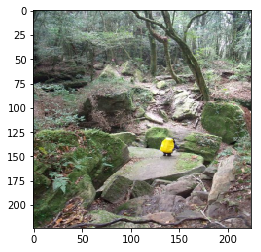

Showing 1 index image


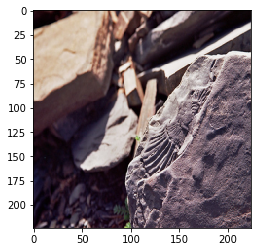

Showing 2 index image


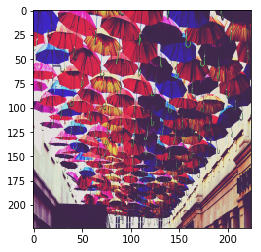

Showing 3 index image


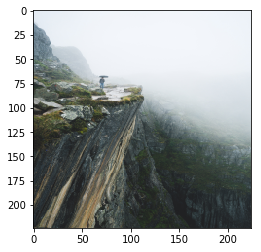

Showing 4 index image


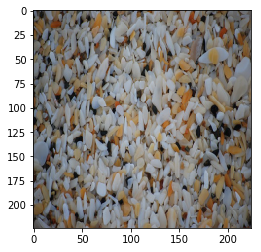

Showing 5 index image


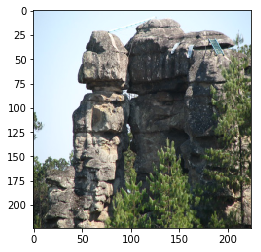

Showing 6 index image


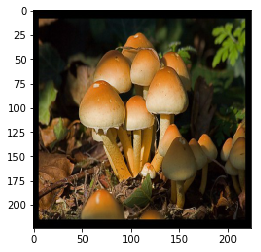

Showing 7 index image


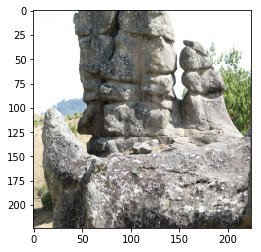

Showing 8 index image


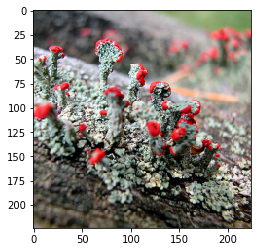

Showing 9 index image


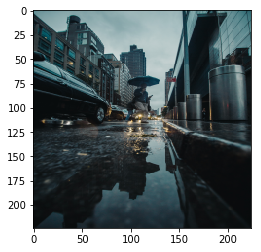

In [20]:
# Randomly shuffle each set
np.random.RandomState(10)
np.random.shuffle(allflrDat)
np.random.shuffle(allnonflrDat)

# Show 10 examples of the images, if it's shuffled it shouldn't all be one type

data = allnonflrDat

for i in range(10):
    index = i
    print("Showing %s index image" %(index))
    imgplot = plt.imshow(data[index])
    plt.show()

In [21]:
# Tag all flowers to 1 and all non-flowers to 0
allflrLbl = np.ones((allflrDat.shape[0]))
allnonflrLbl = np.zeros((allnonflrDat.shape[0]))

print("For the flower and non-flower label datasets:")
print("The shapes are %s, %s" \
      %(allflrLbl.shape, allnonflrLbl.shape))

For the flower and non-flower label datasets:
The shapes are (2689,), (2105,)


In [23]:
import math

trSplit = 0.8
trflr_index = math.floor(trSplit*allflrLbl.shape[0])
trnonflr_index = math.floor(trSplit*allnonflrLbl.shape[0])

print("Indices for %s split is %s and %s" %(trSplit, trflr_index, trnonflr_index))

Indices for 0.8 split is 2151 and 1684


In [24]:
trDat = np.vstack((allflrDat[0:trflr_index,], allnonflrDat[0:trnonflr_index,]))
trLbl = np.concatenate((allflrLbl[0:trflr_index,], allnonflrLbl[0:trnonflr_index,]))
tsDat = np.vstack((allflrDat[trflr_index:,], allnonflrDat[trnonflr_index:,]))
tsLbl = np.concatenate((allflrLbl[trflr_index:,], allnonflrLbl[trnonflr_index:,]))

print("For the training and test datasets:")
print("The shapes are %s, %s, %s, %s" \
      %(trDat.shape, trLbl.shape, tsDat.shape, tsLbl.shape))

For the training and test datasets:
The shapes are (3835, 224, 224, 3), (3835,), (959, 224, 224, 3), (959,)


In [26]:
trLbl[trflr_index-2:trflr_index+2]

np.savez("./npz/flrnonflr-train-imgs224-0.8.npz", trDat)
np.savez("./npz/flrnonflr-train-labels224-0.8.npz", trLbl)
np.savez("./npz/flrnonflr-test-imgs224-0.8.npz", tsDat)
np.savez("./npz/flrnonflr-test-labels224-0.8.npz", tsLbl)